<a href="https://colab.research.google.com/github/tennissta99660/Sentiment_analysis/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy pandas matplotlib scikit-learn


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.datasets import imdb

# load imdb dataset top 10000 words
vocab_size = 10000
max_length = 100

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 100)
Testing data shape: (25000, 100)


In [4]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.7148 - loss: 0.5210 - val_accuracy: 0.8132 - val_loss: 0.3838
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9012 - loss: 0.2579 - val_accuracy: 0.8481 - val_loss: 0.3426
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9424 - loss: 0.1618 - val_accuracy: 0.8433 - val_loss: 0.4174
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9678 - loss: 0.0954 - val_accuracy: 0.8299 - val_loss: 0.5396
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9775 - loss: 0.0682 - val_accuracy: 0.8269 - val_loss: 0.5914


In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8284 - loss: 0.5915
Test Accuracy: 0.8269


In [7]:
def predict_sentiment(review):
    # load imdb word index
    word_index = imdb.get_word_index()
    words = review.lower().split()

    # convert  words to integer token
    sequence = [word_index[word] if word in word_index else 0 for word in words]

    sequence = pad_sequences([sequence], maxlen=max_length)

    # predicting the  sentiment
    prediction = model.predict(sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment, prediction

# test  function
review = "The movie was fantastic! I really loved it."
print(predict_sentiment(review))


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
('Positive', 0.9819303)


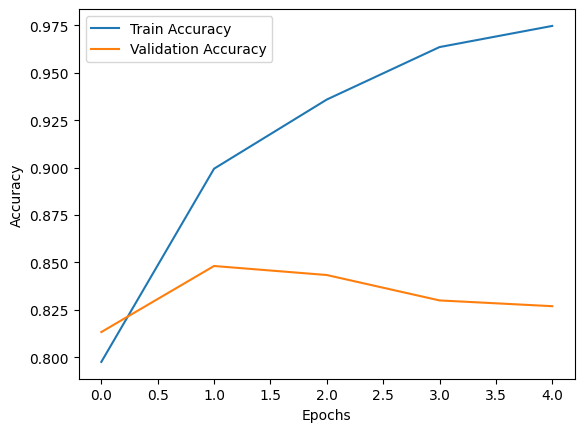

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
